# Model selection and results 

## Load raw results as data frames

In [3]:
require(gridExtra)
require(grid)
require(gtable)
require(ggplot2)

# detach("package:occCompaRe")
# require(occCompaRe)
# require(occCompaReExp)

devtools::load_all("../occCompaRe")
devtools::load_all(".")

Loading occCompare
Loading occCompareExp


## Define experiments to be evaluated

**Note: The raw results of the experiments have already been calculated with ``run_experiments()``.**

A proper set up of the experiments is required by defining the classifier comparison settings list (parcc). Furthermore, a function (get_refset()) must be available which creates the reference sets as required by the functions of occCompaRe

In doubt how this can be done see .002_setup.

In [4]:
parcc <- set_expOpts("revision1", "b")

## Load test performance as grouped data frames

One data frame is returned per methods. Still, they cannot be combined into one data frame since they differ in columns due to the parameters.

In [5]:
res <- load_results(c(".trainUtest", ".resampling"), verbosity=1, overwrite=FALSE)

Loading results from D:/Diss/occcomp/results_rdata_agri6clUforest/sum_revision1b/results.RDS 


## Model selection 

We now get a final result for different model selection approaches.

Note that the maximum achievable accuracy over all models and thresholds is returned automatically (identifier: ``k``).  

In [7]:
ms <- matrix(c(
  "FLEE", "FLEE", NA,
  "FLEE", "at0", "bsvm",
  "FLEE", "at0", "ocsvm",
  #"FLEE", "minTP", NA,
  "FLEE", "tenTP", NA,
  "FLEE", "mxSSSP", NA,
  "FLEE", "eqSSSP", NA,
  "FLI", "FLI", NA,
  "FLI", "at0", "bsvm",
  "FLI", "at0", "ocsvm",
  #"FLI", "minTP", NA,
  "FLI", "tenTP", NA,
  "FLI", "mxSSSP", NA,
  "FLI", "eqSSSP", NA,
  "AUC", "FLEE", NA, 
  "AUC", "FLI", NA, 
  "AUC", "at0", "bsvm", 
  "AUC", "at0", "ocsvm", 
  #"AUC", "minTP", NA, 
  "AUC", "tenTP", NA, 
  "AUC", "mxSSSP", NA,
  "AUC", "eqSSSP", NA), ncol=3, byrow=TRUE) %>%
  as.data.frame(); colnames(ms) <- c("ps", "ts", "cl")

AC <- model_selection(res, ms=ms, acc_metric="mxK", 
                      verbose=T, overwrite=FALSE)

Loading results from: D:/Diss/occcomp/results_rdata_agri6clUforest/sum_revision1b/modsel.RDS 
         method   ps     ts          ms
1          star    k      k         k.k
241      binsvm    k      k         k.k
481       ocsvm    k      k         k.k
721        bsvm    k      k         k.k
961      maxent    k      k         k.k
1201  maxentDef  DEF      k       DEF.k
1441      ocsvm FLEE   FLEE   FLEE.FLEE
1681       bsvm FLEE   FLEE   FLEE.FLEE
1921     maxent FLEE   FLEE   FLEE.FLEE
2161  maxentDef  DEF   FLEE    DEF.FLEE
2401       bsvm FLEE    at0    FLEE.at0
2641      ocsvm FLEE    at0    FLEE.at0
2881      ocsvm FLEE  tenTP  FLEE.tenTP
3121       bsvm FLEE  tenTP  FLEE.tenTP
3361     maxent FLEE  tenTP  FLEE.tenTP
3601  maxentDef  DEF  tenTP   DEF.tenTP
3841      ocsvm FLEE mxSSSP FLEE.mxSSSP
4081       bsvm FLEE mxSSSP FLEE.mxSSSP
4321     maxent FLEE mxSSSP FLEE.mxSSSP
4561  maxentDef  DEF mxSSSP  DEF.mxSSSP
4801      ocsvm FLEE eqSSSP FLEE.eqSSSP
5041       bsvm FLEE eqSSS

## Performance Loss

In [8]:
PL <- ddp_perfLoss(AC, metric="K", best="binsvm.k.k")

In [9]:
str(PL)

'data.frame':	13200 obs. of  12 variables:
 $ method : chr  "star" "star" "star" "star" ...
 $ seed   : Factor w/ 10 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ fset   : Factor w/ 3 levels "re3b","tsx","re3bUtsx": 1 1 1 1 1 1 1 1 2 2 ...
 $ nP     : Factor w/ 1 level "50": 1 1 1 1 1 1 1 1 1 1 ...
 $ nU     : Factor w/ 1 level "10000": 1 1 1 1 1 1 1 1 1 1 ...
 $ idP    : Factor w/ 8 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 1 2 ...
 $ mxK.mxK: num  0.931 0.949 0.625 0.971 0.673 ...
 $ K      : num  0.931 0.949 0.625 0.971 0.673 ...
 $ ps     : chr  "k" "k" "k" "k" ...
 $ ts     : chr  "k" "k" "k" "k" ...
 $ ms     : Factor w/ 35 levels "k.k","k.at0",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ PL     : num  0 -0.0185 -0.0271 0 -0.0141 ...


## Plot & table values for the manuscript

### Performance loss

In [10]:
fVals4plot <- get_fVals4plot()
fVals4plot$method[] <- LETTERS[c(26, 1:4)]
str(fVals4plot$method)

 Named chr [1:5] "Z" "A" "B" "C" "D"
 - attr(*, "names")= chr [1:5] "binsvm" "bsvm" "maxent" "maxentDef" ...


Loading occCompare
Loading occCompareExp


'method': Levels required for plot not found in data:
  binsvm


The following `from` values were not present in `x`: binsvm


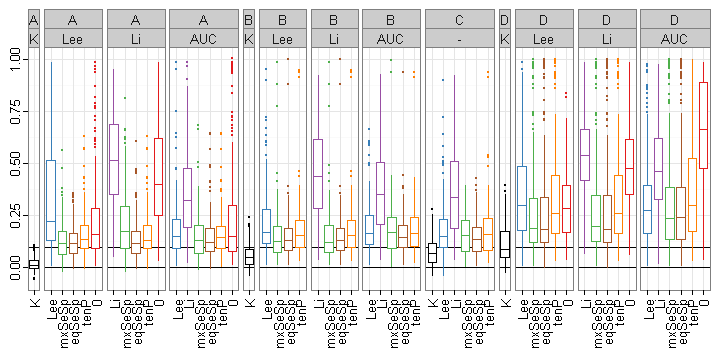

In [11]:
devtools::load_all("../occCompaRe")
devtools::load_all(".")

options(repr.plot.width=6, repr.plot.height=3)
ggp <- ggp_perfloss(PL,
                    ignore_methods="star",
                    factorVals4plot=fVals4plot,
                    cols4plot=get_cols4plot(),
                    box_lwd=.2, 
                    box_outlier_size=.2,
                    axis.text.size=8,
                    strip.text.size=8,
                    rotate_axis.title.y=TRUE,
                    panel.margin.y=0,
                    panel.margin.x=.2
)
g <- ggplotGrob(ggp)
g$heights[[3]] = unit(.4,"cm")
g$heights[[4]] = unit(.4,"cm")
grid.draw(g)

In [86]:
pdf("../occCompareManu/03_revision_a/plots/A_PL_accK.pdf",
    width=5.5, height=3)
grid.draw(g)
dev.off()

pdf 
  2

In [12]:
PL_summary <- group_by(PL, method, ps, ts) %>%
      summarise(mean=round(mean(PL), 3),
                sd=round(sd(PL), 3)) %>%
      filter(mean == min(mean)) %>%
      arrange(method, ps)

PL_summary

method,ps,ts,mean,sd
bsvm,AUC,eqSSSP,0.141,0.098
bsvm,FLEE,eqSSSP,0.124,0.075
bsvm,FLI,eqSSSP,0.134,0.092
bsvm,k,k,0.018,0.030
maxent,AUC,eqSSSP,0.158,0.097
maxent,FLEE,eqSSSP,0.149,0.106
maxent,FLI,eqSSSP,0.149,0.106
maxent,k,k,0.058,0.050
maxentDef,DEF,k,0.080,0.065
ocsvm,AUC,FLEE,0.315,0.203


In [16]:
PL_summary <- group_by(PL, method, ps, ts) %>%
      filter(method=="maxentDef") %>%  
      summarise(mean=round(mean(PL), 3),
                sd=round(sd(PL), 3)) %>%
      arrange(method, mean) %>% slice(1:2)

PL_summary

method,ps,ts,mean,sd
maxentDef,DEF,k,0.080,0.065
maxentDef,DEF,eqSSSP,0.144,0.081


In [ ]:
quantile(filter(PL, ms=="FLEE.eqSSSP" & method=="bsvm")$PL, c(0,.25,.5,.75, 1))